# HW 2: Visualizing statistical error with synthetic data

One way to understand how a model behaves is to study how that model performs on synthetic data.  Synthetic data has two advantages over real world data:

1. We can specify the bayes error exactly.  (This quantity is never known for real world data.)

2. We can precisely control the extent to which are model assumptions are satisfied, and determine how robust our model is to false assumptions.

The disadvantage of using synthetic data is that a model is not guaranteed to work well on real world data if we've only evaluated it on synthetic data.  Therefore, in practice, we typically want to evaluate a model on both synthetic and real world data.

**Goal of this homework:**  You will study how three different models (logistic regression, naive bayes, and Fisher's linear discriminant) perform under different conditions.  In particular, you will see how several properties of the input data affect these models' statistical error differently.  These properties include: the number of data points, feature dimensions, number of classes, distribution of the data, and the noisiness of the data.

**Grading:** There are 22 problems/subproblems in this homework.  Each is worth 5 points, for a total of 110 points.

## The Setup

The following code loads the numpy and scikit-learn libraries into python and defines the  `generate_data` function.  This function will be used in each of the subsequent problems to plot how changes in the parameters to the synthetic datasets effect the accuracy of our models.  You should be able to understand the semantics of the parameters passed into the function, but you do not need to understand the details of how the function is implemented.

In [1]:
################################################################################
# DO NOT MODIFY THIS CODE BLOCK
################################################################################

# load libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

# generate random distributions for each class/mode
# i.e. randomly generate the parameters for the distributions
# we will generate random samples from the random distributions in the generate_data function
d_max=1024
c_max=1024
mu_max=np.random.randn(d_max,c_max)
modes_max=1024
mode_offsets_max=np.random.randn(d_max,c_max)

def generate_data(
    n,
    d,
    c,
    sigma,
    distribution,
    modes,
):
    '''
    n: the number of data points per class per mode
    d: the number of dimensions/features for each data point
    c: the number of classes
    sigma: controls the variance of the data points
    distribution: the marginal distribution of the data
    modes: the number of mixtures in the distribution
    '''

    assert(d<=d_max)
    assert(c<=c_max)
    assert(modes<=modes_max)
    
    # these variables are used to calculate the mean for each mode in each class
    # we only calculate these values once, so they are not placed in the subfunction/for loops below
    mu=mu_max[:d,:c]
    mode_offsets=mode_offsets_max[:d,:]*2    
    
    def generate_dataset(n):
        '''
        generates n (x,y) pairs;
        this is broken out into its own subfunction so that we can easily generate 
        training/test splits with the same parameters
        '''
        Xs=[]
        Ys=[]
        for i in range(c):
            for mode in range(modes):
                # the mean for each mode is calculated as the mean of the class 
                # plus a "randomly chosen" mode offset;
                mode_index=(104729*(mode+i))%modes_max
                mean=mu[:,i]+mode_offsets[:,mode_index]
                
                # then we generate samples from the selected distribution
                if distribution=='normal':
                    samples=np.random.randn(n,d)*sigma
                elif distribution=='exponential':
                    samples=np.random.exponential(size=[n,d])*sigma            
                elif distribution=='uniform':
                    samples=np.random.uniform(size=[n,d])*sigma
                    
                # the final values of are Xs are just the samples offset by the calculated means
                Xs.append(mean+samples)
                Ys.append(np.ones(n)*i)
        X=np.concatenate(Xs)
        Y=np.concatenate(Ys)
        
        return (X,Y)
    
    # return the training data and test data
    return (generate_dataset(n),generate_dataset(10000))

## Problem 0: Visualizing the data

The `plot_data` function below helps visualize how the parameters to `generate_data` affect the dataset.

In [2]:
def plot_data(n,d,c,sigma,distribution,modes):
    '''
    plots the first two dimensions of a dataset
    '''
    # generate a small dataset
    ((X,Y),_)=generate_data(n,d,c,sigma,distribution,modes)

    # plot the first two dimensions of the data
    fig, ax = plt.subplots()
    for i in range(c):
        ax.scatter(X[i*n*modes:(i+1)*n*modes,0],X[i*n*modes:(i+1)*n*modes,1])
    plt.title('distribution='+distribution+', modes='+str(modes)+', sigma='+str(sigma))
    plt.show()

**Problem 0a:** Plot a dataset that has a large bayes error.

HINT: Set `n=100`, `d=2`, and `c=2`.  Adjust `sigma`, `distribution`, and `modes`.

In [3]:
# insert code here

**Problem 0b:** Plot a dataset that has a small bayes error.

HINT: Set `n=100`, `d=2`, and `c=2`.  Adjust `sigma`, `distribution`, and `modes`.

In [4]:
# insert code here

**Problem 0c:** Plot a dataset that has a small bayes error, but a large modeling error for any linear model.

HINT: Set `n=100`, `d=2`, and `c=2`.  Adjust `sigma`, `distribution`, and `modes`.

In [5]:
# insert code here

**Problem 0d:**  Is it possible to get a bayes error of 0?  If so, plot an example; if not, describe why (1-2 sentences).

In [6]:
# insert code/explanation here

## Problem 1: plotting `n` vs. classification accuracy

Plot graphs showing how classification accuracy scales with the number of data points $n$.  You should have three graphs, one for each choice of distribution; and each graph should show the accuracy of linear discriminant analysis, naive bayes, and logistic regression.

To help get you started, I've provided sample code for the naive bayes model below.  Follow the template I used for naive bayes to add experiments using the other two models.

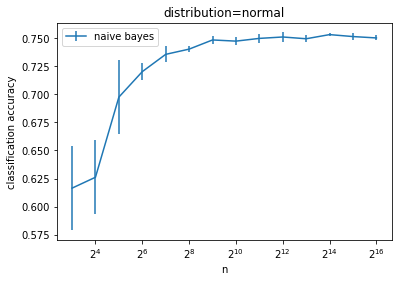

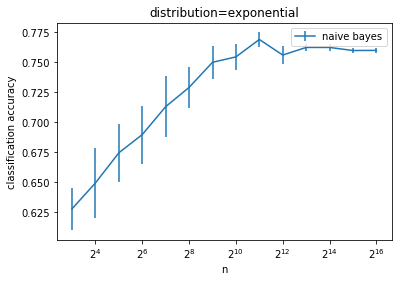

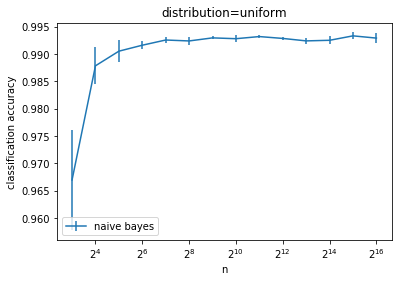

In [7]:
ns=[ 2**b for b in range(3,17) ]
d=10
c=2
sigma=10
modes=1
distributions=['normal','exponential','uniform']

for distribution in distributions:

    # this dictionary stores summaries of the results of each experiment
    scores={
        'nb_ave':[],
        'nb_std':[],
    }
    
    for n in ns:    
        # repeat each experiment several times,
        # storing each result in the scores_itr dictionary
        scores_itr={
            'nb':[],
        }
        for trial in range(5):
            # generate the data
            ((X_train,Y_train),(X_test,Y_test))=generate_data(n,d,c,sigma,distribution,modes)

            # train a naive bayes model
            nb = GaussianNB()
            nb.fit(X_train,Y_train)
            scores_itr['nb'].append(nb.score(X_test,Y_test))

        # record the mean and standard deviations of each experiment
        scores['nb_ave'].append(np.mean(scores_itr['nb']))
        scores['nb_std'].append(np.std(scores_itr['nb']))

    # plot the results of each experiment
    plt.errorbar(ns, scores['nb_ave'], yerr=scores['nb_std'], label='naive bayes')
    plt.xscale('log',basex=2)
    plt.xlabel('n')
    plt.ylabel('classification accuracy')
    plt.legend()
    plt.title('distribution='+distribution)
    plt.show()

**Problem 1b:** The bias and variance both decrease as `n` increases, and are essentially the same for all three input distributions and models.  Describe how the bayes and modeling errors change as `n`, the distribution, and the model change.  (1-2 sentences each)

_Place you answer here._

## Problem 2: plotting `n` vs. classification accuracy (multimodal)

Repeat the experiment in Problem 1, but set `sigma=1` and `modes=10`.  This change makes the input dataset a bit more interesting, and better simulates real world data.

In [8]:
# insert code here

**Problem 2b:** Describe the differences you see between using multimodal and unimodal data distributions.  (1-2 sentences.)

_Place your answer here._

**Problem 2c:** How does adding more modes affect the bayes error and modeling error of each graph?  (1-2 sentences.)

_Place your answer here._


## Problem 3: plotting `modes` vs. classification accuracy

Repeat the experiment in Problem 2, but fix `n=256` and let `modes` vary from 1 to 20 (linearly with step 1). 

In [9]:
# insert code here

**Problem 3b:** Use the graphs above to describe how adding more modes affects the bayes and modeling error (1-2 sentences).  For these models, increasing the number of modes has a negligible effect on the bias and variance of the models.

_Place your answer here._

## Problem 4: Plotting `d` vs classification accuracy

Repeat the experiment in Problem 2, but fix `n=256` and vary `d` from `2` to `64` (logarithmically with base 2).  Your plots should have `d` on the x-axis.

In [10]:
# insert code here

**Problem 4b:** Use the graphs above to describe how adding more dimensions affects the bayes error, bias, and variance of each model (1-2 sentences).  For these models, adding more dimensions has essentially no effect on the modeling error.

_Place your answer here._

## Problem 5: Plotting `c` vs classification accuracy

Repeat the experiment in Problem 2, but fix `n=256` and vary `c` from 2 to 10 (linearly with step 2).  Your plots should have `c` on the x-axis.

In [11]:
# insert code here

**Problem 5b:** Use the graphs above to describe how adding more classes affects the bayes error and modeling error (1-2 sentences).  For these models, adding more dimensions has a negligible effect on the bias and variance.

_Place your answer here._


## Problem 6: Plotting `sigma` vs classification accuracy

Repeat problem 2, but fix `n=256` and vary `sigma` from `0.2` to `4` (linearly with step `0.2`).  Your plots should have `sigma` on the x-axis.

In [12]:
# insert code here

**Problem 6b:** Adding more noise (i.e. increasing `sigma`) increases the bayes error of the problem.  Why? (1-2 sentences)

_Place your answer here._

**Problem 6c:**
Use the plots above to describe how the modeling error changes as a function of the bayes error (i.e. how modeling error changes as a function os `sigma`). (1-2 sentences)

_Place your answer here._


## Problem 7: Plotting regularization strength vs classification accuracy

This problem is closely related to the "bias variance tradeoff curve" that we generated for ridge regression on the boston dataset.  In this problem, however, you will use the synthetic dataset as in problem 2 (but with a fixed `n=256`.  

None of the dataset parameters will vary in this problem.  Instead, you will train logistic regression models with different regularization strengths, and plot regularization strength vs. accuracy.  Your plot should have two lines on it (one for l2 regularization, and the other for l1 regularization).

You can find the documentation for scikit learn's logistic regression function at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

The parameters of interest for this problem are `penalty` and `C`.

In [13]:
# insert code here

**Problem 7b:** As `C` varies, how does the bias and variance vary?  Pay careful attention to scikit learn's definition of `C`, which is slightly different than how they define the regularization strength for ridge regression and how we defined it in class.  (1-2 sentences)

_Place your answer here._

**Problem 7c:** As `C` varies, how does the bayes error and model error vary?  (1-2 sentences)

_Place your answer here._

**Problem 7d:** When does it make sense to use l1 regularization vs l2 regularization? (1-2 sentences)

HINT: The plots above don't convey this information, you'll have to look it up.

_Place your answer here._